## 数据获取

In [3]:
import akshare as ak
import pandas as pd

# 获取贵州茅台历史数据
stock_df = ak.stock_zh_a_hist(symbol="600519", 
                              period="daily", 
                              start_date="20200101", 
                              end_date="20241231", 
                              adjust="qfq")

print(stock_df.head())
print(f"获取到 {len(stock_df)} 条数据")
stock_df

           日期    股票代码      开盘      收盘      最高      最低     成交量           成交额  \
0  2020-01-02  600519  896.77  898.77  913.83  884.77  148099  1.669684e+10   
1  2020-01-03  600519  885.77  847.33  885.77  845.67  130319  1.426638e+10   
2  2020-01-06  600519  839.63  846.76  861.67  836.07   63415  6.853918e+09   
3  2020-01-07  600519  846.27  863.30  867.77  845.17   47854  5.220697e+09   
4  2020-01-08  600519  853.82  856.91  864.27  851.35   25008  2.720372e+09   

     振幅   涨跌幅    涨跌额   换手率  
0  3.05 -5.57 -53.00  1.18  
1  4.46 -5.72 -51.44  1.04  
2  3.02 -0.07  -0.57  0.50  
3  2.67  1.95  16.54  0.38  
4  1.50 -0.74  -6.39  0.20  
获取到 1212 条数据


,日期,股票代码,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
0,2020-01-02,600519,896.77,898.77,913.83,884.77,148099,1.669684e+10,3.05,-5.57,-53.00,1.18
1,2020-01-03,600519,885.77,847.33,885.77,845.67,130319,1.426638e+10,4.46,-5.72,-51.44,1.04
2,2020-01-06,600519,839.63,846.76,861.67,836.07,63415,6.853918e+09,3.02,-0.07,-0.57,0.50
3,2020-01-07,600519,846.27,863.30,867.77,845.17,47854,5.220697e+09,2.67,1.95,16.54,0.38
4,2020-01-08,600519,853.82,856.91,864.27,851.35,25008,2.720372e+09,1.50,-0.74,-6.39,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...
1207,2024-12-25,600519,1487.24,1478.44,1487.24,1474.54,17123,2.621062e+09,0.85,-0.59,-8.82,0.14
1208,2024-12-26,600519,1482.44,1476.23,1487.22,1471.44,18287,2.798840e+09,1.07,-0.15,-2.21,0.15
1209,2024-12-27,600519,1477.34,1477.41,1484.44,1467.94,20759,3.170191e+09,1.12,0.08,1.18,0.17
1210,2024-12-30,600519,1482.41,1473.44,1492.40,1473.44,25130,3.849543e+09,1.28,-0.27,-3.97,0.20


## 3/10均线策略实验

原始列名： ['日期', '股票代码', '开盘', '收盘', '最高', '最低', '成交量', '成交额', '振幅', '涨跌幅', '涨跌额', '换手率']
数据获取成功，共 1212 条数据
                开盘      收盘      最高      最低     成交量     成交额            振幅  \
日期                                                                         
2020-01-02  600519  896.77  898.77  913.83  884.77  148099  1.669684e+10   
2020-01-03  600519  885.77  847.33  885.77  845.67  130319  1.426638e+10   
2020-01-06  600519  839.63  846.76  861.67  836.07   63415  6.853918e+09   
2020-01-07  600519  846.27  863.30  867.77  845.17   47854  5.220697e+09   
2020-01-08  600519  853.82  856.91  864.27  851.35   25008  2.720372e+09   

             涨跌幅   涨跌额    换手率  
日期                             
2020-01-02  3.05 -5.57 -53.00  
2020-01-03  4.46 -5.72 -51.44  
2020-01-06  3.02 -0.07  -0.57  
2020-01-07  2.67  1.95  16.54  
2020-01-08  1.50 -0.74  -6.39  


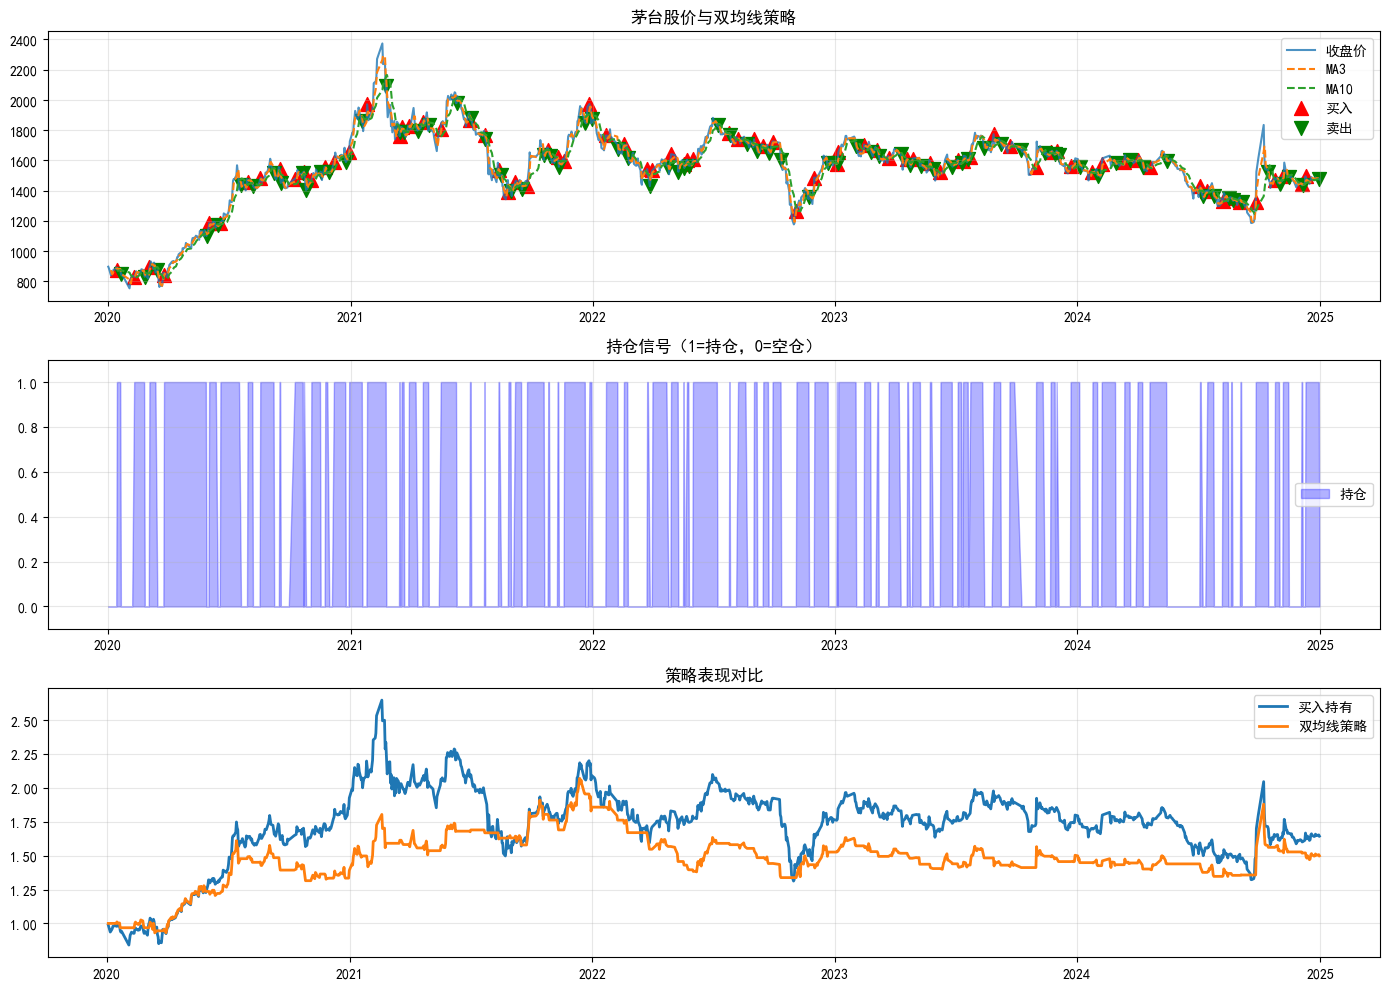

策略绩效总结
回测区间：2020-01-02 至 2024-12-31
总收益率 - 买入持有：64.35%
总收益率 - 双均线：49.88%
年化收益率 - 买入持有：10.79%
年化收益率 - 双均线：8.70%
交易胜率：47.70%


In [7]:
# 1. 导入需要的库
import akshare as ak
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 2. 获取数据
stock_df = ak.stock_zh_a_hist(symbol="600519", 
                              period="daily", 
                              start_date="20200101", 
                              end_date="20241231", 
                              adjust="qfq")

# 3. 数据预处理——动态获取列名，不写死
df = stock_df.copy()

# 先看看列名是什么（打印出来看看）
print("原始列名：", df.columns.tolist())

# 直接按位置取列，不管列名叫什么
# 第0列是日期，第1列是开盘，第2列是收盘，第3列是最高，第4列是最低
df = df.iloc[:, :11]  # 只取前11列，避免列数不匹配

# 重新设置列名（用英文）
df.columns = ['日期', '开盘', '收盘', '最高', '最低', '成交量', '成交额', '振幅', '涨跌幅', '涨跌额', '换手率']

# 日期设为索引
df['日期'] = pd.to_datetime(df['日期'])
df.set_index('日期', inplace=True)

# 把需要用的列转为数值
df['收盘'] = pd.to_numeric(df['收盘'])

print(f"数据获取成功，共 {len(df)} 条数据")
print(df.head())

# 4. 计算技术指标：双均线
df['MA3'] = df['收盘'].rolling(window=3).mean()
df['MA10'] = df['收盘'].rolling(window=10).mean()

# 5. 生成交易信号
df['信号'] = 0
df.loc[df['MA3'] > df['MA10'], '信号'] = 1
df.loc[df['MA3'] <= df['MA10'], '信号'] = 0

# 6. 计算策略收益
df['标的收益率'] = df['收盘'].pct_change()
df['策略收益率'] = df['信号'].shift(1) * df['标的收益率']

# 7. 计算累计收益
df['标的累计'] = (1 + df['标的收益率']).cumprod()
df['策略累计'] = (1 + df['策略收益率']).cumprod()

# 8. 可视化
plt.figure(figsize=(14, 10))

# 图1：股价和均线
plt.subplot(3, 1, 1)
plt.plot(df.index, df['收盘'], label='收盘价', alpha=0.8)
plt.plot(df.index, df['MA3'], label='MA3', linestyle='--')
plt.plot(df.index, df['MA10'], label='MA10', linestyle='--')

# 标出买卖点（只在有信号变化的地方标）
buy_signals = df[df['信号'].diff() == 1].index
sell_signals = df[df['信号'].diff() == -1].index
if len(buy_signals) > 0:
    plt.scatter(buy_signals, df.loc[buy_signals, '收盘'], marker='^', color='red', s=100, label='买入')
if len(sell_signals) > 0:
    plt.scatter(sell_signals, df.loc[sell_signals, '收盘'], marker='v', color='green', s=100, label='卖出')

plt.title('茅台股价与双均线策略')
plt.legend()
plt.grid(True, alpha=0.3)

# 图2：持仓信号
plt.subplot(3, 1, 2)
plt.fill_between(df.index, 0, df['信号'], color='blue', alpha=0.3, label='持仓')
plt.ylim(-0.1, 1.1)
plt.title('持仓信号（1=持仓，0=空仓）')
plt.legend()
plt.grid(True, alpha=0.3)

# 图3：策略表现对比
plt.subplot(3, 1, 3)
plt.plot(df.index, df['标的累计'], label='买入持有', linewidth=2)
plt.plot(df.index, df['策略累计'], label='双均线策略', linewidth=2)
plt.title('策略表现对比')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 9. 输出绩效指标
总收益率_标的 = (df['标的累计'].iloc[-1] - 1) * 100
总收益率_策略 = (df['策略累计'].iloc[-1] - 1) * 100

# 年化收益率
交易日数 = len(df)
年数 = 交易日数 / 250
年化_标的 = (df['标的累计'].iloc[-1] ** (1/年数) - 1) * 100
年化_策略 = (df['策略累计'].iloc[-1] ** (1/年数) - 1) * 100

# 胜率
正确次数 = len(df[(df['策略收益率'] > 0) & (df['信号'].shift(1) == 1)])
总持仓天数 = (df['信号'] == 1).sum()
胜率 = 正确次数 / 总持仓天数 * 100 if 总持仓天数 > 0 else 0

print('='*50)
print('策略绩效总结')
print('='*50)
print(f'回测区间：{df.index[0].strftime("%Y-%m-%d")} 至 {df.index[-1].strftime("%Y-%m-%d")}')
print(f'总收益率 - 买入持有：{总收益率_标的:.2f}%')
print(f'总收益率 - 双均线：{总收益率_策略:.2f}%')
print(f'年化收益率 - 买入持有：{年化_标的:.2f}%')
print(f'年化收益率 - 双均线：{年化_策略:.2f}%')
print(f'交易胜率：{胜率:.2f}%')
print('='*50)


## 策略对比

正在获取数据...
数据获取成功，共 1212 条数据

开始跑策略对比...
正在跑: 买入持有
正在跑: 均线(5,20)
正在跑: 均线(10,30)
正在跑: 动量(20)
正在跑: 动量(60)
正在跑: 均值回归(20,2)
正在跑: 均值回归(30,2.5)

多策略对比结果（按年化收益率排序）
        策略名称  总收益率%  年化收益率%  最大回撤%  夏普比率   胜率%  交易次数
均值回归(30,2.5) 146.89   21.05 -31.80  0.75 49.91     7
        买入持有  64.35   10.80 -50.43  0.23 47.89     0
    均线(5,20)  47.11    8.43 -37.22  0.24 47.49    39
  均值回归(20,2)  40.66    7.41 -47.69  0.20 48.59    10
      动量(60)  33.14    6.41 -42.68  0.16 45.77    29
   均线(10,30)  18.51    3.65 -42.44  0.05 47.22    21
      动量(20)  16.56    3.27 -45.89  0.03 46.89    68


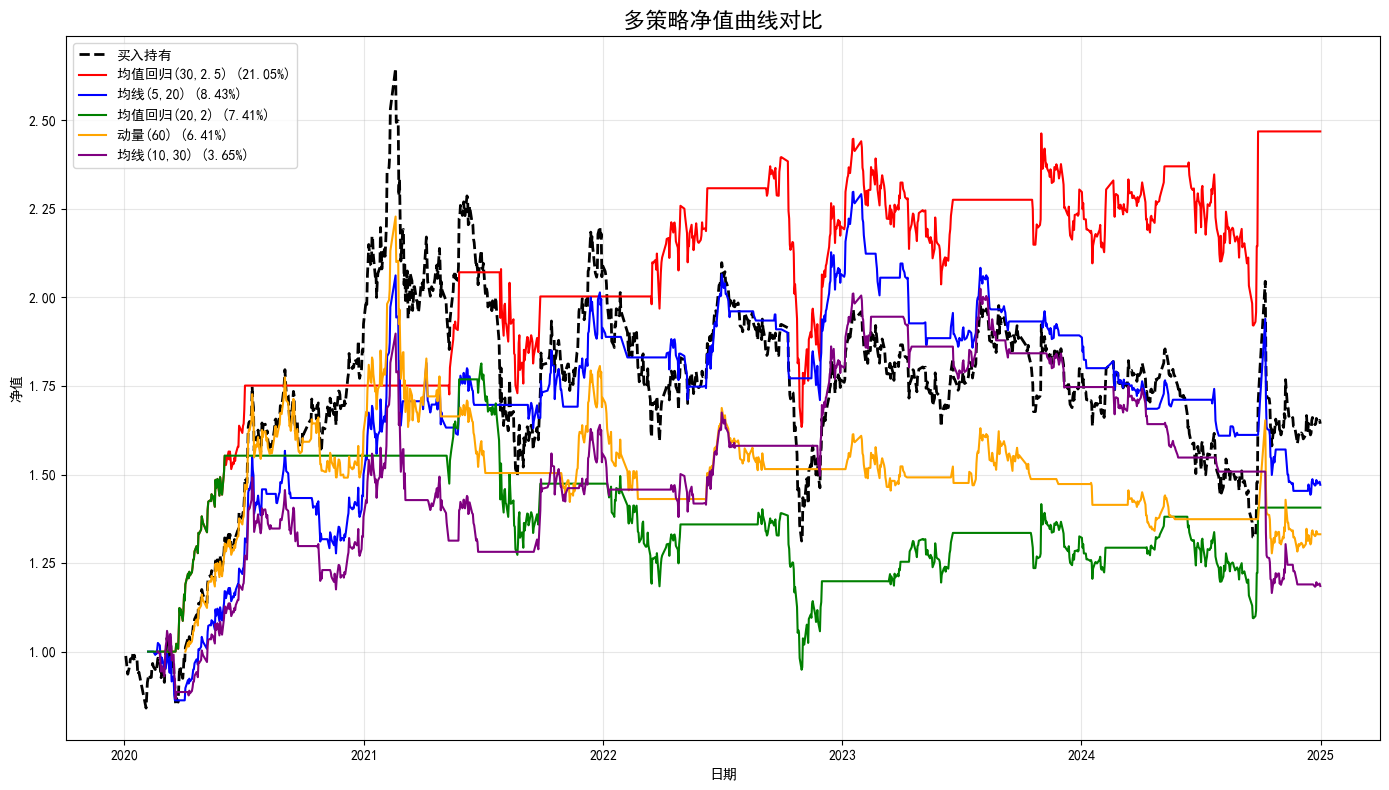


🏆 最佳策略
策略名称：均值回归(30,2.5)
年化收益：21.05%
最大回撤：-31.8%
夏普比率：0.75
胜率：49.91%
交易次数：7

🛡️ 最稳健策略（夏普比率最高）
策略名称：均值回归(30,2.5)
夏普比率：0.75
年化收益：21.05%
最大回撤：-31.8%

🐢 最懒策略（交易次数最少）
策略名称：买入持有
交易次数：0
年化收益：10.8%


In [11]:
# 1. 导入需要的库
import akshare as ak
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 2. 获取数据
print("正在获取数据...")
stock_df = ak.stock_zh_a_hist(symbol="600519", 
                              period="daily", 
                              start_date="20200101", 
                              end_date="20241231", 
                              adjust="qfq")

# 3. 数据预处理
df_raw = stock_df.copy()
df_raw = df_raw.iloc[:, :11]
df_raw.columns = ['日期', '开盘', '收盘', '最高', '最低', '成交量', '成交额', '振幅', '涨跌幅', '涨跌额', '换手率']
df_raw['日期'] = pd.to_datetime(df_raw['日期'])
df_raw.set_index('日期', inplace=True)
df_raw['收盘'] = pd.to_numeric(df_raw['收盘'])
print(f"数据获取成功，共 {len(df_raw)} 条数据")

# 4. 定义策略函数

# 4.1 买入持有（基准）
def strategy_buyhold(df):
    data = df.copy()
    data['信号'] = 1  # 永远持仓
    data['标的收益率'] = data['收盘'].pct_change()
    data['策略收益率'] = data['信号'].shift(1) * data['标的收益率']
    data['策略累计'] = (1 + data['策略收益率']).cumprod()
    return data

# 4.2 双均线策略
def strategy_ma(df, short=5, long=20):
    data = df.copy()
    data['MA_S'] = data['收盘'].rolling(window=short).mean()
    data['MA_L'] = data['收盘'].rolling(window=long).mean()
    data['信号'] = 0
    data.loc[data['MA_S'] > data['MA_L'], '信号'] = 1
    data['标的收益率'] = data['收盘'].pct_change()
    data['策略收益率'] = data['信号'].shift(1) * data['标的收益率']
    data['策略累计'] = (1 + data['策略收益率']).cumprod()
    return data

# 4.3 动量策略
def strategy_momentum(df, lookback=20):
    data = df.copy()
    data['动量'] = data['收盘'].pct_change(lookback)
    data['信号'] = 0
    data.loc[data['动量'] > 0, '信号'] = 1
    data['标的收益率'] = data['收盘'].pct_change()
    data['策略收益率'] = data['信号'].shift(1) * data['标的收益率']
    data['策略累计'] = (1 + data['策略收益率']).cumprod()
    return data

# 4.4 均值回归策略（布林带）
def strategy_meanreversion(df, lookback=20, std_dev=2):
    data = df.copy()
    data['MA'] = data['收盘'].rolling(window=lookback).mean()
    data['STD'] = data['收盘'].rolling(window=lookback).std()
    data['上轨'] = data['MA'] + std_dev * data['STD']
    data['下轨'] = data['MA'] - std_dev * data['STD']
    
    # 生成信号：跌破下轨买入（1），突破上轨卖出（-1）
    data['信号_raw'] = 0
    data.loc[data['收盘'] < data['下轨'], '信号_raw'] = 1
    data.loc[data['收盘'] > data['上轨'], '信号_raw'] = -1
    
    # 转换成持仓信号
    data['信号'] = 0
    position = 0
    for i in range(len(data)):
        if data['信号_raw'].iloc[i] == 1:  # 买入信号
            position = 1
        elif data['信号_raw'].iloc[i] == -1:  # 卖出信号
            position = 0
        data.loc[data.index[i], '信号'] = position
    
    data['标的收益率'] = data['收盘'].pct_change()
    data['策略收益率'] = data['信号'].shift(1) * data['标的收益率']
    data['策略累计'] = (1 + data['策略收益率']).cumprod()
    return data

# 5. 计算绩效指标
def calculate_metrics(data, strategy_name):
    """计算各种绩效指标"""
    data = data.dropna()
    if len(data) == 0:
        return None
    
    # 总收益率
    total_return = (data['策略累计'].iloc[-1] - 1) * 100
    
    # 年化收益率
    days = len(data)
    years = days / 250
    if years > 0:
        annual_return = (data['策略累计'].iloc[-1] ** (1/years) - 1) * 100
    else:
        annual_return = 0
    
    # 最大回撤
    peak = data['策略累计'].expanding().max()
    drawdown = (data['策略累计'] - peak) / peak
    max_drawdown = drawdown.min() * 100
    
    # 夏普比率（简化）
    annual_vol = data['策略收益率'].std() * (250 ** 0.5)
    if annual_vol != 0:
        sharpe = (annual_return/100 - 0.025) / annual_vol
    else:
        sharpe = 0
    
    # 胜率
    win_days = len(data[(data['策略收益率'] > 0) & (data['信号'].shift(1) == 1)])
    total_trade_days = (data['信号'] == 1).sum()
    win_rate = win_days / total_trade_days * 100 if total_trade_days > 0 else 0
    
    # 交易次数
    trades = (data['信号'].diff().abs() == 1).sum() // 2
    
    return {
        '策略名称': strategy_name,
        '总收益率%': round(total_return, 2),
        '年化收益率%': round(annual_return, 2),
        '最大回撤%': round(max_drawdown, 2),
        '夏普比率': round(sharpe, 2),
        '胜率%': round(win_rate, 2),
        '交易次数': trades
    }

# 6. 跑所有策略
print("\n开始跑策略对比...")

# 定义要测试的策略
strategies = [
    ('买入持有', lambda df: strategy_buyhold(df)),
    ('均线(5,20)', lambda df: strategy_ma(df, 5, 20)),
    ('均线(10,30)', lambda df: strategy_ma(df, 10, 30)),
    ('动量(20)', lambda df: strategy_momentum(df, 20)),
    ('动量(60)', lambda df: strategy_momentum(df, 60)),
    ('均值回归(20,2)', lambda df: strategy_meanreversion(df, 20, 2)),
    ('均值回归(30,2.5)', lambda df: strategy_meanreversion(df, 30, 2.5))
]

# 存储结果
results = []
strategy_data = {}  # 保存每个策略的数据，用于画图

for name, strategy_func in strategies:
    print(f"正在跑: {name}")
    data = strategy_func(df_raw)
    if data is not None and len(data.dropna()) > 0:
        metrics = calculate_metrics(data, name)
        if metrics:
            results.append(metrics)
            strategy_data[name] = data.dropna()

# 7. 显示结果表格
df_results = pd.DataFrame(results)
df_results = df_results.sort_values('年化收益率%', ascending=False)

print("\n" + "="*100)
print("多策略对比结果（按年化收益率排序）")
print("="*100)
print(df_results.to_string(index=False))

# 8. 画对比图
plt.figure(figsize=(14, 8))

# 先画买入持有作为基准
if '买入持有' in strategy_data:
    bh_data = strategy_data['买入持有']
    plt.plot(bh_data.index, bh_data['策略累计'], 
             label='买入持有', linewidth=2, color='black', linestyle='--')

# 画其他策略（只画前5个，避免太乱）
colors = ['red', 'blue', 'green', 'orange', 'purple']
plot_count = 0
for i, row in df_results.iterrows():
    name = row['策略名称']
    if name != '买入持有' and name in strategy_data and plot_count < 5:
        data = strategy_data[name]
        plt.plot(data.index, data['策略累计'], 
                 label=f"{name} ({row['年化收益率%']}%)", 
                 linewidth=1.5, color=colors[plot_count])
        plot_count += 1

plt.title('多策略净值曲线对比', fontsize=16)
plt.xlabel('日期')
plt.ylabel('净值')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 9. 输出最佳策略
best = df_results.iloc[0]
print("\n" + "="*50)
print("🏆 最佳策略")
print("="*50)
print(f"策略名称：{best['策略名称']}")
print(f"年化收益：{best['年化收益率%']}%")
print(f"最大回撤：{best['最大回撤%']}%")
print(f"夏普比率：{best['夏普比率']}")
print(f"胜率：{best['胜率%']}%")
print(f"交易次数：{best['交易次数']}")

# 10. 输出最稳健的策略（夏普最高）
best_sharpe = df_results.loc[df_results['夏普比率'].idxmax()]
print("\n" + "="*50)
print("🛡️ 最稳健策略（夏普比率最高）")
print("="*50)
print(f"策略名称：{best_sharpe['策略名称']}")
print(f"夏普比率：{best_sharpe['夏普比率']}")
print(f"年化收益：{best_sharpe['年化收益率%']}%")
print(f"最大回撤：{best_sharpe['最大回撤%']}%")

# 11. 输出交易最少的策略（适合低频）
least_trades = df_results.loc[df_results['交易次数'].idxmin()]
print("\n" + "="*50)
print("🐢 最懒策略（交易次数最少）")
print("="*50)
print(f"策略名称：{least_trades['策略名称']}")
print(f"交易次数：{least_trades['交易次数']}")
print(f"年化收益：{least_trades['年化收益率%']}%")

## 策略普适性测试

开始获取股票数据...
✅ 贵州茅台 (600519) 获取成功，共 1212 条数据
✅ 五粮液 (000858) 获取成功，共 1212 条数据
✅ 美的集团 (000333) 获取成功，共 1212 条数据
✅ 海康威视 (002415) 获取成功，共 1212 条数据
✅ 万科A (000002) 获取成功，共 1212 条数据
✅ 中国平安 (601318) 获取成功，共 1212 条数据
✅ 招商银行 (600036) 获取成功，共 1212 条数据
✅ 宁德时代 (300750) 获取成功，共 1212 条数据
✅ 比亚迪 (002594) 获取成功，共 1212 条数据
✅ 长江电力 (600900) 获取成功，共 1201 条数据
共获取 10 只股票数据

开始策略回测...
测试: 贵州茅台 (600519)
测试: 五粮液 (000858)
测试: 美的集团 (000333)
测试: 海康威视 (002415)
测试: 万科A (000002)
测试: 中国平安 (601318)
测试: 招商银行 (600036)
测试: 宁德时代 (300750)
测试: 比亚迪 (002594)
测试: 长江电力 (600900)

策略普适性验证结果
股票名称           时间段  策略年化%  基准年化%  超额收益%  最大回撤%   胜率%  交易次数 跑赢基准
贵州茅台 202002-202412  21.05  11.07   9.98 -31.80 49.91     7    ✅
 五粮液 202002-202412  18.87   4.60  14.27 -35.68 47.09     6    ✅
美的集团 202002-202412  16.87  10.52   6.35 -39.71 52.44     7    ✅
海康威视 202002-202412   1.41   1.59  -0.18 -42.69 51.28     5    ❌
 万科A 202002-202412  -1.54 -25.05  23.51 -54.49 42.95     6    ✅
中国平安 202002-202412   4.50  -6.86  11.35 -50.54 48.76     6    ✅
招商银行 202002

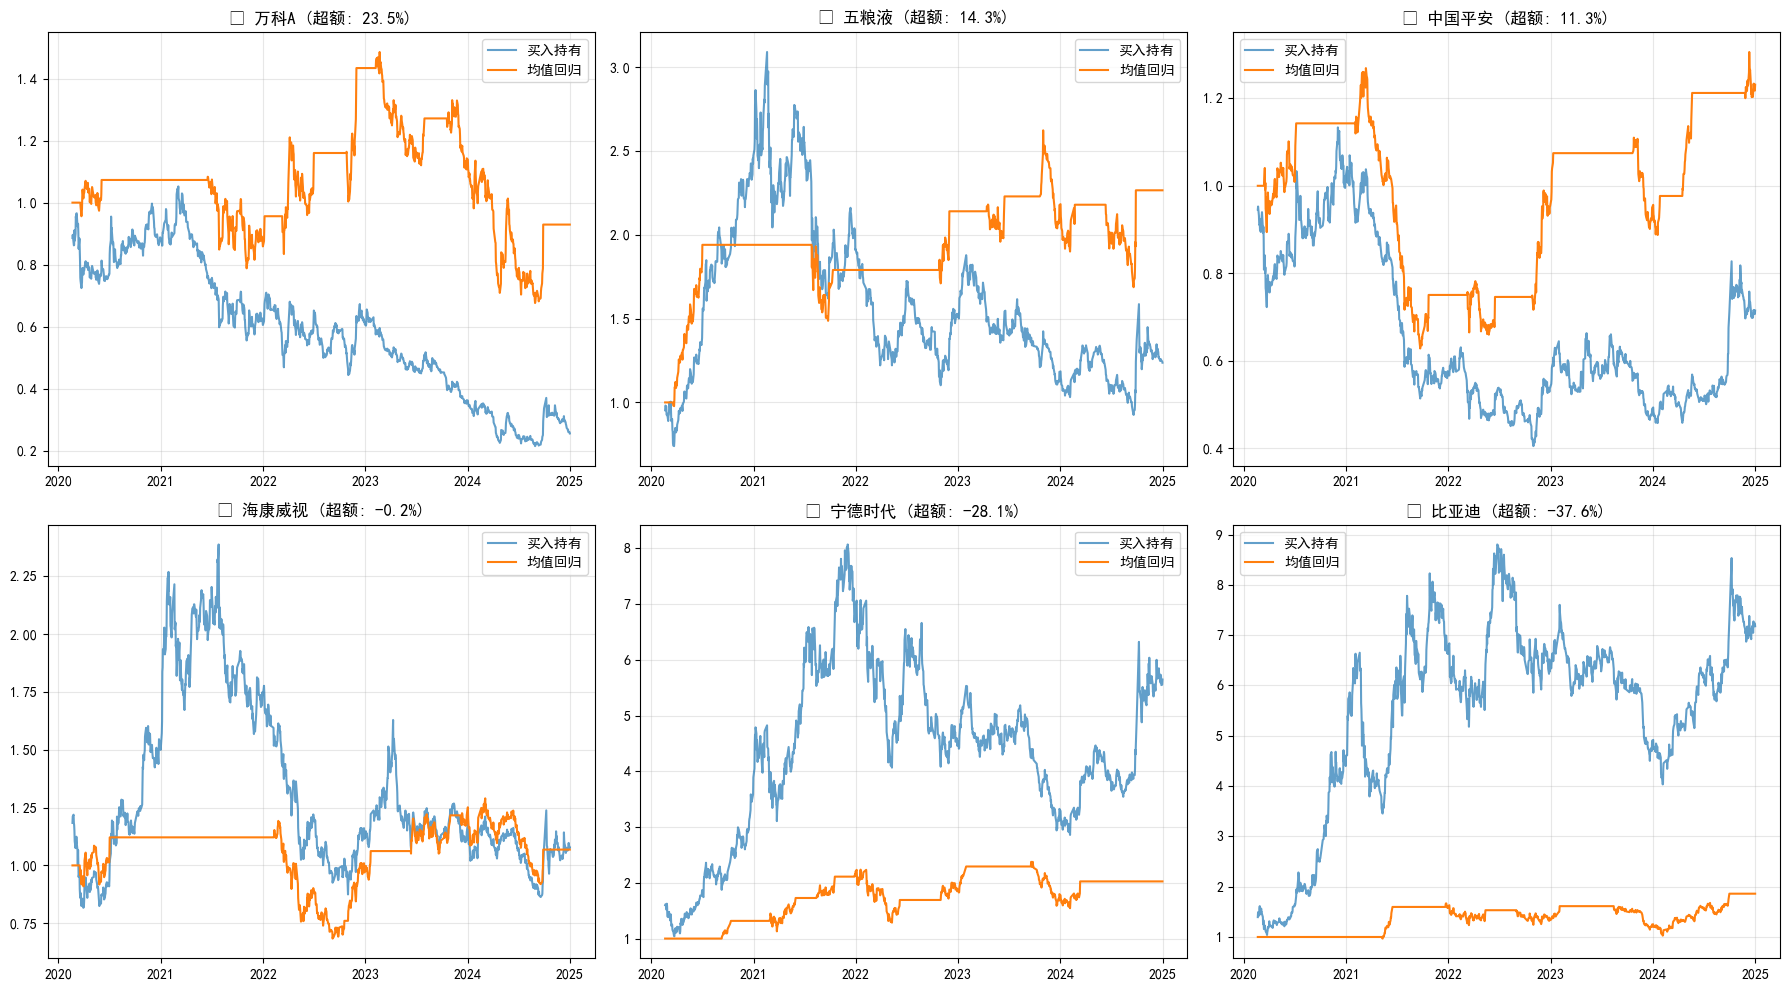


时间段稳定性测试（以贵州茅台为例）
✅ 贵州茅台 (600519) 获取成功，共 486 条数据
✅ 贵州茅台 (600519) 获取成功，共 484 条数据
✅ 贵州茅台 (600519) 获取成功，共 242 条数据
      时间段  策略年化%  基准年化%  超额收益% 跑赢基准
2020-2021  46.23  49.71  -3.48    ❌
2022-2023   8.02  -7.51  15.53    ✅
     2024  15.06  -9.76  24.82    ✅

📊 最终结论
✅ 策略普适性强：在大部分股票上都能跑赢基准

策略最强股票: 万科A (超额+23.51%)
策略最弱股票: 比亚迪 (超额-37.65%)


In [12]:
# 1. 导入需要的库
import akshare as ak
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 2. 定义策略函数（均值回归）
def strategy_meanreversion(df, lookback=30, std_dev=2.5):
    """
    均值回归策略（布林带）
    """
    data = df.copy()
    data['MA'] = data['收盘'].rolling(window=lookback).mean()
    data['STD'] = data['收盘'].rolling(window=lookback).std()
    data['上轨'] = data['MA'] + std_dev * data['STD']
    data['下轨'] = data['MA'] - std_dev * data['STD']
    
    # 生成信号
    data['信号_raw'] = 0
    data.loc[data['收盘'] < data['下轨'], '信号_raw'] = 1
    data.loc[data['收盘'] > data['上轨'], '信号_raw'] = -1
    
    # 转换成持仓信号
    data['信号'] = 0
    position = 0
    for i in range(len(data)):
        if data['信号_raw'].iloc[i] == 1:
            position = 1
        elif data['信号_raw'].iloc[i] == -1:
            position = 0
        data.loc[data.index[i], '信号'] = position
    
    data['标的收益率'] = data['收盘'].pct_change()
    data['策略收益率'] = data['信号'].shift(1) * data['标的收益率']
    data['策略累计'] = (1 + data['策略收益率']).cumprod()
    data['标的累计'] = (1 + data['标的收益率']).cumprod()
    
    return data

# 3. 定义绩效计算函数
def calculate_metrics(data, strategy_name="策略", benchmark_name="买入持有"):
    """
    计算绩效指标
    """
    data = data.dropna()
    if len(data) == 0:
        return None
    
    days = len(data)
    years = days / 250
    
    # 策略指标
    strategy_return = (data['策略累计'].iloc[-1] - 1) * 100
    strategy_annual = (data['策略累计'].iloc[-1] ** (1/years) - 1) * 100 if years > 0 else 0
    
    # 基准指标
    benchmark_return = (data['标的累计'].iloc[-1] - 1) * 100
    benchmark_annual = (data['标的累计'].iloc[-1] ** (1/years) - 1) * 100 if years > 0 else 0
    
    # 超额收益
    excess_return = strategy_annual - benchmark_annual
    
    # 最大回撤（策略）
    peak = data['策略累计'].expanding().max()
    drawdown = (data['策略累计'] - peak) / peak
    max_drawdown = drawdown.min() * 100
    
    # 胜率
    win_days = len(data[(data['策略收益率'] > 0) & (data['信号'].shift(1) == 1)])
    total_trade_days = (data['信号'] == 1).sum()
    win_rate = win_days / total_trade_days * 100 if total_trade_days > 0 else 0
    
    # 交易次数
    trades = (data['信号'].diff().abs() == 1).sum() // 2
    
    return {
        '股票': data.attrs.get('code', '未知'),
        '时间段': f"{data.index[0].strftime('%Y%m')}-{data.index[-1].strftime('%Y%m')}",
        '策略年化%': round(strategy_annual, 2),
        '基准年化%': round(benchmark_annual, 2),
        '超额收益%': round(excess_return, 2),
        '最大回撤%': round(max_drawdown, 2),
        '胜率%': round(win_rate, 2),
        '交易次数': trades,
        '跑赢基准': '✅' if strategy_annual > benchmark_annual else '❌'
    }

# 4. 获取多只股票数据
def get_stock_data(code, name, start_date="20200101", end_date="20241231"):
    """
    获取单只股票数据并添加名称属性
    """
    try:
        df = ak.stock_zh_a_hist(symbol=code, 
                                period="daily", 
                                start_date=start_date, 
                                end_date=end_date, 
                                adjust="qfq")
        
        # 数据清洗
        df = df.iloc[:, :11]
        df.columns = ['日期', '开盘', '收盘', '最高', '最低', '成交量', '成交额', '振幅', '涨跌幅', '涨跌额', '换手率']
        df['日期'] = pd.to_datetime(df['日期'])
        df.set_index('日期', inplace=True)
        df['收盘'] = pd.to_numeric(df['收盘'])
        
        # 添加属性
        df.attrs['code'] = code
        df.attrs['name'] = name
        
        print(f"✅ {name} ({code}) 获取成功，共 {len(df)} 条数据")
        return df
    except Exception as e:
        print(f"❌ {name} ({code}) 获取失败：{e}")
        return None

# 5. 定义要测试的股票池
stock_pool = [
    ('600519', '贵州茅台'),  # 白酒龙头
    ('000858', '五粮液'),    # 白酒老二
    ('000333', '美的集团'),  # 家电龙头
    ('002415', '海康威视'), # 安防龙头
    ('000002', '万科A'),     # 地产龙头
    ('601318', '中国平安'),  # 保险龙头
    ('600036', '招商银行'),  # 银行龙头
    ('300750', '宁德时代'),  # 新能源龙头
    ('002594', '比亚迪'),    # 新能源车龙头
    ('600900', '长江电力')   # 电力龙头（波动小）
]

# 6. 获取所有数据
print("开始获取股票数据...")
print("="*60)

all_data = {}
for code, name in stock_pool:
    df = get_stock_data(code, name, "20200101", "20241231")
    if df is not None:
        all_data[code] = df

print("="*60)
print(f"共获取 {len(all_data)} 只股票数据")

# 7. 在每只股票上回测
print("\n开始策略回测...")
print("="*80)

results = []
for code, df in all_data.items():
    name = df.attrs['name']
    print(f"测试: {name} ({code})")
    
    # 跑策略
    result_df = strategy_meanreversion(df, lookback=30, std_dev=2.5)
    
    # 计算指标
    metrics = calculate_metrics(result_df)
    if metrics:
        metrics['股票名称'] = name
        results.append(metrics)

# 8. 显示结果表格
df_results = pd.DataFrame(results)
df_results = df_results[['股票名称', '时间段', '策略年化%', '基准年化%', '超额收益%', '最大回撤%', '胜率%', '交易次数', '跑赢基准']]

print("\n" + "="*100)
print("策略普适性验证结果")
print("="*100)
print(df_results.to_string(index=False))

# 9. 统计跑赢比例
win_count = (df_results['跑赢基准'] == '✅').sum()
total_count = len(df_results)
win_rate = win_count / total_count * 100

print("\n" + "="*60)
print(f"跑赢基准比例: {win_count}/{total_count} = {win_rate:.1f}%")
print("="*60)

# 10. 按超额收益排序
print("\n" + "="*60)
print("超额收益排名")
print("="*60)
df_sorted = df_results.sort_values('超额收益%', ascending=False)
print(df_sorted[['股票名称', '超额收益%', '策略年化%', '基准年化%']].to_string(index=False))

# 11. 画出表现最好的3只和最差的3只
best_stocks = df_sorted.head(3)['股票名称'].tolist()
worst_stocks = df_sorted.tail(3)['股票名称'].tolist()

# 画图
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# 画最好的
for i, name in enumerate(best_stocks):
    code = [c for c, n in stock_pool if n == name][0]
    df = all_data[code]
    result = strategy_meanreversion(df, 30, 2.5)
    result = result.dropna()
    
    axes[i].plot(result.index, result['标的累计'], label='买入持有', linewidth=1.5, alpha=0.7)
    axes[i].plot(result.index, result['策略累计'], label='均值回归', linewidth=1.5)
    axes[i].set_title(f'✅ {name} (超额: {df_sorted[df_sorted["股票名称"]==name]["超额收益%"].values[0]:.1f}%)')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

# 画最差的
for i, name in enumerate(worst_stocks):
    j = i + 3
    code = [c for c, n in stock_pool if n == name][0]
    df = all_data[code]
    result = strategy_meanreversion(df, 30, 2.5)
    result = result.dropna()
    
    axes[j].plot(result.index, result['标的累计'], label='买入持有', linewidth=1.5, alpha=0.7)
    axes[j].plot(result.index, result['策略累计'], label='均值回归', linewidth=1.5)
    axes[j].set_title(f'❌ {name} (超额: {df_sorted[df_sorted["股票名称"]==name]["超额收益%"].values[0]:.1f}%)')
    axes[j].legend()
    axes[j].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 12. 额外测试：不同时间段的表现
print("\n" + "="*60)
print("时间段稳定性测试（以贵州茅台为例）")
print("="*60)

# 分成三段
periods = [
    ("20200101", "20211231", "2020-2021"),
    ("20220101", "20231231", "2022-2023"),
    ("20240101", "20241231", "2024")
]

period_results = []
for start, end, name in periods:
    df = get_stock_data("600519", "贵州茅台", start, end)
    if df is not None:
        result = strategy_meanreversion(df, 30, 2.5)
        metrics = calculate_metrics(result)
        if metrics:
            period_results.append({
                '时间段': name,
                '策略年化%': metrics['策略年化%'],
                '基准年化%': metrics['基准年化%'],
                '超额收益%': metrics['超额收益%'],
                '跑赢基准': metrics['跑赢基准']
            })

df_period = pd.DataFrame(period_results)
print(df_period.to_string(index=False))

# 13. 最终结论
print("\n" + "="*60)
print("📊 最终结论")
print("="*60)

if win_rate >= 70:
    print("✅ 策略普适性强：在大部分股票上都能跑赢基准")
elif win_rate >= 50:
    print("⚠️ 策略普适性一般：在约半数股票上能跑赢基准")
else:
    print("❌ 策略普适性弱：只在少数股票上有效，可能存在过拟合")

print(f"\n策略最强股票: {df_sorted.iloc[0]['股票名称']} (超额+{df_sorted.iloc[0]['超额收益%']}%)")
print(f"策略最弱股票: {df_sorted.iloc[-1]['股票名称']} (超额{df_sorted.iloc[-1]['超额收益%']}%)")

正在获取数据...
数据获取成功，共 1212 条数据

运行组合策略...

多策略组合对比结果
  策略  年化收益%   总收益%  最大回撤%  夏普比率
均值回归  20.51 146.89 -31.80  0.74
买入持有  10.80  64.35 -50.43  0.23
趋势策略   8.30  47.11 -37.22  0.24
组合策略   3.99  20.84 -45.89  0.06
动量策略   3.21  16.56 -45.89  0.03


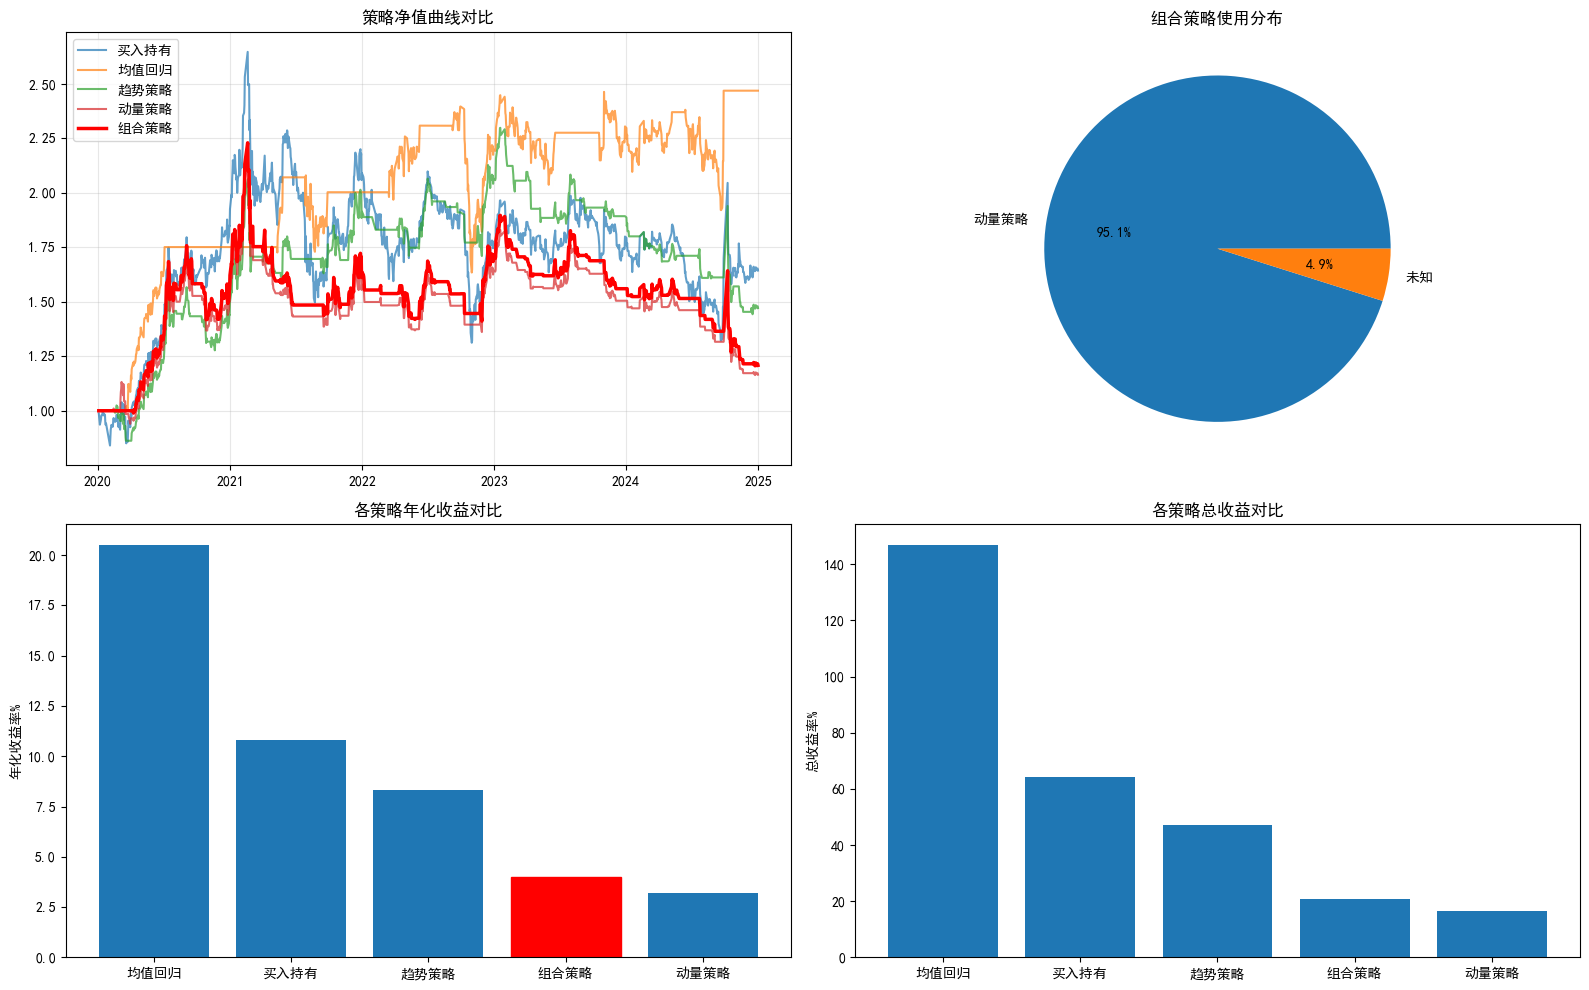


📊 详细分析

组合策略 vs 买入持有:
  年化收益: 3.99% vs 10.8%
  超额收益: +-6.81%
  最大回撤: -45.89% vs -50.43%
  夏普比率: 0.06 vs 0.23

⚠️ 组合策略未跑赢最好的单一策略（均值回归）
   差距: 16.52%

组合策略使用情况:
  动量策略: 95.1%
  未知: 4.9%


In [14]:
# 1. 导入需要的库
import akshare as ak
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 2. 获取数据
print("正在获取数据...")
stock_df = ak.stock_zh_a_hist(symbol="600519", 
                              period="daily", 
                              start_date="20200101", 
                              end_date="20241231", 
                              adjust="qfq")

# 数据预处理
df_raw = stock_df.copy()
df_raw = df_raw.iloc[:, :11]
df_raw.columns = ['日期', '开盘', '收盘', '最高', '最低', '成交量', '成交额', '振幅', '涨跌幅', '涨跌额', '换手率']
df_raw['日期'] = pd.to_datetime(df_raw['日期'])
df_raw.set_index('日期', inplace=True)
df_raw['收盘'] = pd.to_numeric(df_raw['收盘'])
print(f"数据获取成功，共 {len(df_raw)} 条数据")

# 3. 定义单个策略

# 3.1 均值回归策略
def strategy_meanreversion(df, lookback=30, std_dev=2.5):
    data = df.copy()
    data['MA'] = data['收盘'].rolling(window=lookback).mean()
    data['STD'] = data['收盘'].rolling(window=lookback).std()
    data['上轨'] = data['MA'] + std_dev * data['STD']
    data['下轨'] = data['MA'] - std_dev * data['STD']
    
    data['信号_raw'] = 0
    data.loc[data['收盘'] < data['下轨'], '信号_raw'] = 1
    data.loc[data['收盘'] > data['上轨'], '信号_raw'] = -1
    
    data['信号'] = 0
    position = 0
    for i in range(len(data)):
        if data['信号_raw'].iloc[i] == 1:
            position = 1
        elif data['信号_raw'].iloc[i] == -1:
            position = 0
        data.loc[data.index[i], '信号'] = position
    
    # 返回收益率序列
    ret = data['信号'].shift(1) * data['收盘'].pct_change()
    return ret.fillna(0)

# 3.2 趋势策略
def strategy_trend(df, short=5, long=20):
    data = df.copy()
    data['MA_S'] = data['收盘'].rolling(window=short).mean()
    data['MA_L'] = data['收盘'].rolling(window=long).mean()
    data['信号'] = 0
    data.loc[data['MA_S'] > data['MA_L'], '信号'] = 1
    ret = data['信号'].shift(1) * data['收盘'].pct_change()
    return ret.fillna(0)

# 3.3 动量策略
def strategy_momentum(df, lookback=20):
    data = df.copy()
    data['动量'] = data['收盘'].pct_change(lookback)
    data['信号'] = 0
    data.loc[data['动量'] > 0, '信号'] = 1
    ret = data['信号'].shift(1) * data['收盘'].pct_change()
    return ret.fillna(0)

# 4. 市场状态判断
def detect_market_regime(df, lookback=60):
    """判断市场状态：趋势市/震荡市/未知"""
    if len(df) < lookback:
        return 'unknown'
    
    data = df.copy()
    data['MA20'] = data['收盘'].rolling(window=20).mean()
    data['MA60'] = data['收盘'].rolling(window=60).mean()
    
    # 计算均线斜率
    data['MA20_slope'] = data['MA20'].diff(5) / data['MA20'].shift(5)
    data['MA60_slope'] = data['MA60'].diff(5) / data['MA60'].shift(5)
    
    # 计算均线间距
    data['MA_distance'] = abs(data['MA20'] - data['MA60']) / data['MA60']
    
    latest = data.iloc[-1]
    
    if pd.isna(latest['MA20_slope']) or pd.isna(latest['MA60_slope']):
        return 'unknown'
    
    if latest['MA20_slope'] > 0.001 and latest['MA60_slope'] > 0.001 and latest['MA_distance'] > 0.03:
        return 'trend'
    elif abs(latest['MA20_slope']) < 0.001 and abs(latest['MA60_slope']) < 0.001 and latest['MA_distance'] < 0.02:
        return 'range'
    else:
        return 'unknown'

# 5. 组合策略
def strategy_ensemble(df, lookback_window=60):
    """多策略组合"""
    data = df.copy()
    data['标的收益率'] = data['收盘'].pct_change()
    
    # 预计算各策略收益率
    data['mr_ret'] = strategy_meanreversion(df)
    data['trend_ret'] = strategy_trend(df)
    data['mom_ret'] = strategy_momentum(df)
    
    # 初始化组合收益率
    data['组合收益率'] = 0.0
    data['当前策略'] = '未知'
    
    # 滚动判断
    for i in range(lookback_window, len(data)):
        hist_data = data.iloc[i-lookback_window:i]
        regime = detect_market_regime(hist_data)
        
        if regime == 'trend':
            data.loc[data.index[i], '组合收益率'] = data.loc[data.index[i], 'trend_ret']
            data.loc[data.index[i], '当前策略'] = '趋势策略'
        elif regime == 'range':
            data.loc[data.index[i], '组合收益率'] = data.loc[data.index[i], 'mr_ret']
            data.loc[data.index[i], '当前策略'] = '均值回归'
        else:
            data.loc[data.index[i], '组合收益率'] = data.loc[data.index[i], 'mom_ret']
            data.loc[data.index[i], '当前策略'] = '动量策略'
    
    # 计算累计收益
    data['标的累计'] = (1 + data['标的收益率']).cumprod()
    data['mr累计'] = (1 + data['mr_ret']).cumprod()
    data['trend累计'] = (1 + data['trend_ret']).cumprod()
    data['mom累计'] = (1 + data['mom_ret']).cumprod()
    data['组合累计'] = (1 + data['组合收益率']).cumprod()
    
    return data

# 6. 计算绩效指标
def calculate_metrics(data, col_name, strategy_name):
    """计算绩效指标"""
    if col_name not in data.columns:
        return None
    
    series = data[col_name].dropna()
    if len(series) < 10:
        return None
    
    days = len(series)
    years = days / 250
    if years == 0:
        return None
    
    # 总收益率
    total_return = (series.iloc[-1] - 1) * 100
    
    # 年化收益率
    annual_return = (series.iloc[-1] ** (1/years) - 1) * 100
    
    # 最大回撤
    peak = series.expanding().max()
    drawdown = (series - peak) / peak
    max_drawdown = drawdown.min() * 100
    
    # 日收益率
    if col_name == '标的累计':
        daily_ret = data['标的收益率']
    elif col_name == 'mr累计':
        daily_ret = data['mr_ret']
    elif col_name == 'trend累计':
        daily_ret = data['trend_ret']
    elif col_name == 'mom累计':
        daily_ret = data['mom_ret']
    else:
        daily_ret = data['组合收益率']
    
    daily_ret = daily_ret.dropna()
    annual_vol = daily_ret.std() * (250 ** 0.5)
    sharpe = (annual_return/100 - 0.025) / annual_vol if annual_vol != 0 else 0
    
    return {
        '策略': strategy_name,
        '年化收益%': round(annual_return, 2),
        '总收益%': round(total_return, 2),
        '最大回撤%': round(max_drawdown, 2),
        '夏普比率': round(sharpe, 2)
    }

# 7. 运行组合策略
print("\n运行组合策略...")
result = strategy_ensemble(df_raw)

# 去掉开头的NaN
result = result.dropna()

# 8. 计算各策略绩效
strategies_to_compare = [
    ('标的累计', '买入持有'),
    ('mr累计', '均值回归'),
    ('trend累计', '趋势策略'),
    ('mom累计', '动量策略'),
    ('组合累计', '组合策略')
]

metrics_results = []
for col, name in strategies_to_compare:
    metrics = calculate_metrics(result, col, name)
    if metrics:
        metrics_results.append(metrics)

# 9. 显示结果
if len(metrics_results) > 0:
    df_metrics = pd.DataFrame(metrics_results)
    df_metrics = df_metrics.sort_values('年化收益%', ascending=False)
    
    print("\n" + "="*80)
    print("多策略组合对比结果")
    print("="*80)
    print(df_metrics.to_string(index=False))
    
    # 10. 画图
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    
    # 图1：净值曲线对比
    ax1 = axes[0, 0]
    ax1.plot(result.index, result['标的累计'], label='买入持有', linewidth=1.5, alpha=0.7)
    ax1.plot(result.index, result['mr累计'], label='均值回归', linewidth=1.5, alpha=0.7)
    ax1.plot(result.index, result['trend累计'], label='趋势策略', linewidth=1.5, alpha=0.7)
    ax1.plot(result.index, result['mom累计'], label='动量策略', linewidth=1.5, alpha=0.7)
    ax1.plot(result.index, result['组合累计'], label='组合策略', linewidth=2.5, color='red')
    ax1.set_title('策略净值曲线对比')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 图2：策略使用分布
    ax2 = axes[0, 1]
    strategy_counts = result['当前策略'].value_counts()
    ax2.pie(strategy_counts.values, labels=strategy_counts.index, autopct='%1.1f%%')
    ax2.set_title('组合策略使用分布')
    
    # 图3：各策略年化收益对比
    ax3 = axes[1, 0]
    bars = ax3.bar(df_metrics['策略'], df_metrics['年化收益%'])
    ax3.axhline(y=0, color='black', linewidth=0.5)
    ax3.set_title('各策略年化收益对比')
    ax3.set_ylabel('年化收益率%')
    
    # 给组合策略的柱子标红
    for i, strategy in enumerate(df_metrics['策略']):
        if strategy == '组合策略':
            bars[i].set_color('red')
    
    # 图4：累计收益对比
    ax4 = axes[1, 1]
    ax4.bar(df_metrics['策略'], df_metrics['总收益%'])
    ax4.set_title('各策略总收益对比')
    ax4.set_ylabel('总收益率%')
    
    plt.tight_layout()
    plt.show()
    
    # 11. 详细分析
    print("\n" + "="*80)
    print("📊 详细分析")
    print("="*80)
    
    # 检查组合策略是否存在
    combo_row = df_metrics[df_metrics['策略'] == '组合策略']
    bh_row = df_metrics[df_metrics['策略'] == '买入持有']
    
    if len(combo_row) > 0 and len(bh_row) > 0:
        combo = combo_row.iloc[0]
        bh = bh_row.iloc[0]
        
        print(f"\n组合策略 vs 买入持有:")
        print(f"  年化收益: {combo['年化收益%']}% vs {bh['年化收益%']}%")
        print(f"  超额收益: +{combo['年化收益%'] - bh['年化收益%']:.2f}%")
        print(f"  最大回撤: {combo['最大回撤%']}% vs {bh['最大回撤%']}%")
        print(f"  夏普比率: {combo['夏普比率']} vs {bh['夏普比率']}")
        
        # 找出最好的单一策略
        single_strategies = df_metrics[df_metrics['策略'] != '组合策略']
        best_single = single_strategies.loc[single_strategies['年化收益%'].idxmax()]
        
        if combo['年化收益%'] > best_single['年化收益%']:
            print(f"\n🏆 组合策略跑赢了所有单一策略！")
            print(f"   比最好的单一策略（{best_single['策略']}）还高出 {combo['年化收益%'] - best_single['年化收益%']:.2f}%")
        else:
            print(f"\n⚠️ 组合策略未跑赢最好的单一策略（{best_single['策略']}）")
            print(f"   差距: {best_single['年化收益%'] - combo['年化收益%']:.2f}%")
    
    # 策略使用比例
    print(f"\n组合策略使用情况:")
    for strategy, count in strategy_counts.items():
        pct = count / len(result) * 100
        print(f"  {strategy}: {pct:.1f}%")
        
else:
    print("没有有效的策略结果")

正在获取数据...
数据获取成功，共 1212 条数据

运行均值回归策略...

📊 均值回归策略绩效
策略年化%: 21.05
基准年化%: 11.07
超额年化%: 9.98
策略总收益%: 146.89
基准总收益%: 64.35
策略回撤%: -31.8
基准回撤%: -50.43
夏普比率: 0.75
胜率%: 49.91
交易次数: 7
盈亏比: 1.27


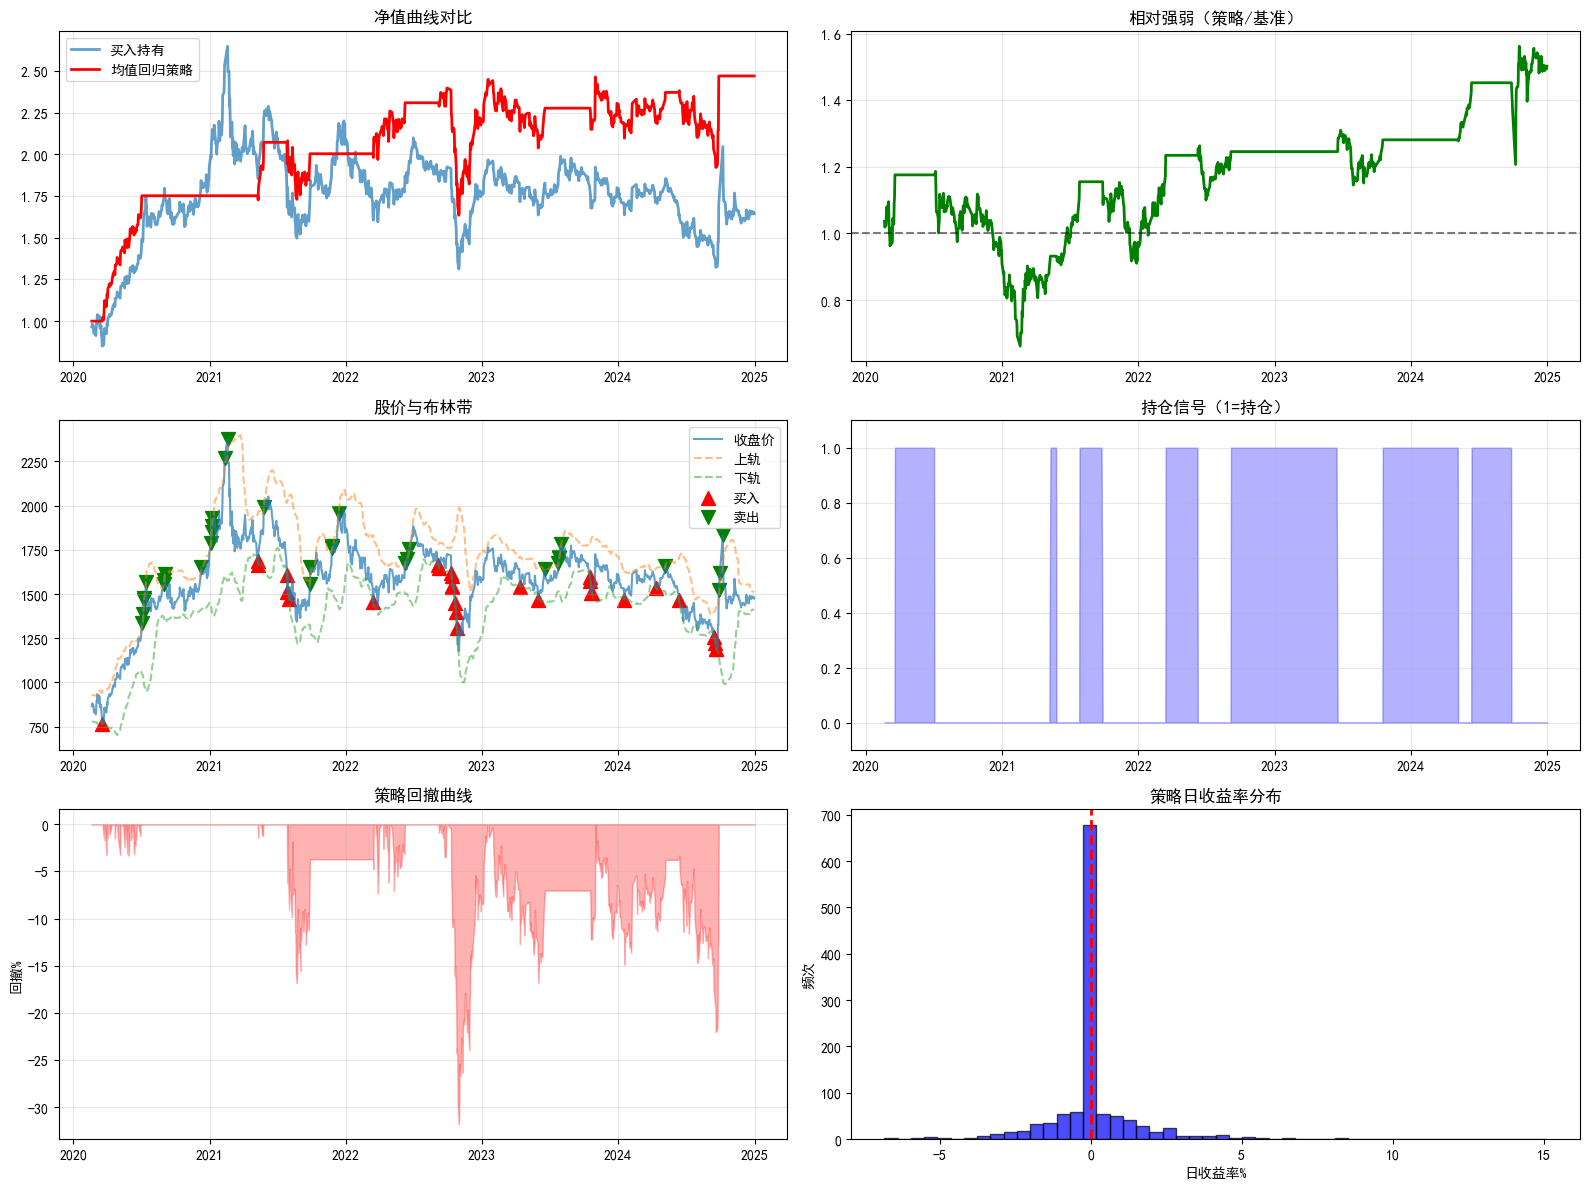


📝 交易记录分析
      买入日期       卖出日期  持仓天数     买入价     卖出价   收益率%
2020-02-20 2020-03-19    28  865.47  762.76 -11.87
2020-07-03 2021-05-10   311 1335.79 1685.79  26.20
2021-05-26 2021-07-27    62 1993.77 1608.08 -19.34
2021-09-27 2022-03-15   169 1555.08 1455.08  -6.43
2022-06-09 2022-09-06    89 1677.08 1662.12  -0.89
2023-06-19 2023-10-18   121 1638.67 1593.38  -2.76
2024-05-07 2024-06-12    36 1659.47 1463.68 -11.80

交易统计:
  总交易次数: 7
  盈利交易: 1
  亏损交易: 6
  平均持仓天数: 117 天
  平均收益率: -3.84%
  最大盈利: 26.20%
  最大亏损: -19.34%

🎯 最终结论
✅ 均值回归策略在茅台上表现优异，年化跑赢买入持有 9.98%

关键优势:
  - 收益更高: 21.05% vs 11.07%
  - 回撤更小: -31.8% vs -50.43%
  - 夏普更好: 0.75 vs 0.23
  - 胜率 49.91%，盈亏比 1.27


In [15]:
# 1. 导入需要的库
import akshare as ak
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 2. 获取数据
print("正在获取数据...")
stock_df = ak.stock_zh_a_hist(symbol="600519", 
                              period="daily", 
                              start_date="20200101", 
                              end_date="20241231", 
                              adjust="qfq")

# 数据预处理
df_raw = stock_df.copy()
df_raw = df_raw.iloc[:, :11]
df_raw.columns = ['日期', '开盘', '收盘', '最高', '最低', '成交量', '成交额', '振幅', '涨跌幅', '涨跌额', '换手率']
df_raw['日期'] = pd.to_datetime(df_raw['日期'])
df_raw.set_index('日期', inplace=True)
df_raw['收盘'] = pd.to_numeric(df_raw['收盘'])
print(f"数据获取成功，共 {len(df_raw)} 条数据")

# 3. 均值回归策略（你的冠军策略）
def mean_reversion_strategy(df, lookback=30, std_dev=2.5):
    """
    均值回归策略（布林带）
    lookback: 计算均线和标准差的周期
    std_dev: 标准差倍数
    """
    data = df.copy()
    
    # 计算布林带
    data['MA'] = data['收盘'].rolling(window=lookback).mean()
    data['STD'] = data['收盘'].rolling(window=lookback).std()
    data['上轨'] = data['MA'] + std_dev * data['STD']
    data['下轨'] = data['MA'] - std_dev * data['STD']
    
    # 生成信号
    data['信号_raw'] = 0
    data.loc[data['收盘'] < data['下轨'], '信号_raw'] = 1   # 跌破下轨买入
    data.loc[data['收盘'] > data['上轨'], '信号_raw'] = -1  # 突破上轨卖出
    
    # 转换成持仓信号（保持持仓直到遇到相反信号）
    data['信号'] = 0
    position = 0
    for i in range(len(data)):
        if data['信号_raw'].iloc[i] == 1:
            position = 1
        elif data['信号_raw'].iloc[i] == -1:
            position = 0
        data.loc[data.index[i], '信号'] = position
    
    # 计算收益
    data['标的收益率'] = data['收盘'].pct_change()
    data['策略收益率'] = data['信号'].shift(1) * data['标的收益率']
    
    # 累计收益
    data['标的累计'] = (1 + data['标的收益率']).cumprod()
    data['策略累计'] = (1 + data['策略收益率']).cumprod()
    
    return data

# 4. 计算绩效指标
def calculate_metrics(data):
    """计算详细的绩效指标"""
    data = data.dropna()
    if len(data) == 0:
        return None
    
    days = len(data)
    years = days / 250
    if years == 0:
        return None
    
    # 基础收益指标
    total_return_strategy = (data['策略累计'].iloc[-1] - 1) * 100
    total_return_benchmark = (data['标的累计'].iloc[-1] - 1) * 100
    
    annual_return_strategy = (data['策略累计'].iloc[-1] ** (1/years) - 1) * 100
    annual_return_benchmark = (data['标的累计'].iloc[-1] ** (1/years) - 1) * 100
    
    # 最大回撤
    peak_strategy = data['策略累计'].expanding().max()
    drawdown_strategy = (data['策略累计'] - peak_strategy) / peak_strategy
    max_drawdown_strategy = drawdown_strategy.min() * 100
    
    peak_benchmark = data['标的累计'].expanding().max()
    drawdown_benchmark = (data['标的累计'] - peak_benchmark) / peak_benchmark
    max_drawdown_benchmark = drawdown_benchmark.min() * 100
    
    # 夏普比率
    annual_vol_strategy = data['策略收益率'].std() * (250 ** 0.5)
    sharpe_strategy = (annual_return_strategy/100 - 0.025) / annual_vol_strategy if annual_vol_strategy != 0 else 0
    
    # 胜率
    win_days = len(data[(data['策略收益率'] > 0) & (data['信号'].shift(1) == 1)])
    total_trade_days = (data['信号'] == 1).sum()
    win_rate = win_days / total_trade_days * 100 if total_trade_days > 0 else 0
    
    # 交易次数
    trades = (data['信号'].diff().abs() == 1).sum() // 2
    
    # 盈亏比
    wins = data[data['策略收益率'] > 0]['策略收益率']
    losses = data[data['策略收益率'] < 0]['策略收益率']
    avg_win = wins.mean() * 100 if len(wins) > 0 else 0
    avg_loss = abs(losses.mean()) * 100 if len(losses) > 0 else 0
    profit_loss_ratio = avg_win / avg_loss if avg_loss != 0 else 0
    
    return {
        '指标': '值',
        '策略年化%': round(annual_return_strategy, 2),
        '基准年化%': round(annual_return_benchmark, 2),
        '超额年化%': round(annual_return_strategy - annual_return_benchmark, 2),
        '策略总收益%': round(total_return_strategy, 2),
        '基准总收益%': round(total_return_benchmark, 2),
        '策略回撤%': round(max_drawdown_strategy, 2),
        '基准回撤%': round(max_drawdown_benchmark, 2),
        '夏普比率': round(sharpe_strategy, 2),
        '胜率%': round(win_rate, 2),
        '交易次数': trades,
        '盈亏比': round(profit_loss_ratio, 2)
    }

# 5. 运行策略
print("\n运行均值回归策略...")
result = mean_reversion_strategy(df_raw, lookback=30, std_dev=2.5)
result = result.dropna()

# 6. 计算指标
metrics = calculate_metrics(result)

# 7. 显示结果
print("\n" + "="*80)
print("📊 均值回归策略绩效")
print("="*80)
if metrics:
    for key, value in metrics.items():
        if key != '指标':
            print(f"{key}: {value}")

# 8. 画图
fig, axes = plt.subplots(3, 2, figsize=(16, 12))

# 图1：净值曲线对比
ax1 = axes[0, 0]
ax1.plot(result.index, result['标的累计'], label='买入持有', linewidth=2, alpha=0.7)
ax1.plot(result.index, result['策略累计'], label='均值回归策略', linewidth=2, color='red')
ax1.set_title('净值曲线对比')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 图2：相对强弱（策略/基准）
ax2 = axes[0, 1]
relative = result['策略累计'] / result['标的累计']
ax2.plot(result.index, relative, color='green', linewidth=2)
ax2.axhline(y=1, color='black', linestyle='--', alpha=0.5)
ax2.set_title('相对强弱（策略/基准）')
ax2.grid(True, alpha=0.3)

# 图3：股价与买卖点
ax3 = axes[1, 0]
ax3.plot(result.index, result['收盘'], label='收盘价', alpha=0.7)
ax3.plot(result.index, result['上轨'], label='上轨', linestyle='--', alpha=0.5)
ax3.plot(result.index, result['下轨'], label='下轨', linestyle='--', alpha=0.5)

# 标出买卖点
buy_signals = result[result['信号_raw'] == 1].index
sell_signals = result[result['信号_raw'] == -1].index
if len(buy_signals) > 0:
    ax3.scatter(buy_signals, result.loc[buy_signals, '收盘'], 
                marker='^', color='red', s=100, label='买入')
if len(sell_signals) > 0:
    ax3.scatter(sell_signals, result.loc[sell_signals, '收盘'], 
                marker='v', color='green', s=100, label='卖出')

ax3.set_title('股价与布林带')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 图4：持仓信号
ax4 = axes[1, 1]
ax4.fill_between(result.index, 0, result['信号'], color='blue', alpha=0.3)
ax4.set_ylim(-0.1, 1.1)
ax4.set_title('持仓信号（1=持仓）')
ax4.grid(True, alpha=0.3)

# 图5：回撤曲线
ax5 = axes[2, 0]
peak_strategy = result['策略累计'].expanding().max()
drawdown_strategy = (result['策略累计'] - peak_strategy) / peak_strategy * 100
ax5.fill_between(result.index, 0, drawdown_strategy, color='red', alpha=0.3)
ax5.set_title('策略回撤曲线')
ax5.set_ylabel('回撤%')
ax5.grid(True, alpha=0.3)

# 图6：收益率分布
ax6 = axes[2, 1]
strategy_returns = result['策略收益率'].dropna() * 100
ax6.hist(strategy_returns, bins=50, alpha=0.7, color='blue', edgecolor='black')
ax6.axvline(x=0, color='red', linestyle='--', linewidth=2)
ax6.set_title('策略日收益率分布')
ax6.set_xlabel('日收益率%')
ax6.set_ylabel('频次')

plt.tight_layout()
plt.show()

# 9. 交易记录分析
print("\n" + "="*80)
print("📝 交易记录分析")
print("="*80)

# 找出所有交易
signal_changes = result[result['信号'].diff() != 0]
trades = []
for i in range(0, len(signal_changes)-1, 2):
    if i+1 < len(signal_changes):
        buy_date = signal_changes.index[i]
        sell_date = signal_changes.index[i+1]
        buy_price = result.loc[buy_date, '收盘']
        sell_price = result.loc[sell_date, '收盘']
        hold_days = (sell_date - buy_date).days
        return_pct = (sell_price / buy_price - 1) * 100
        
        trades.append({
            '买入日期': buy_date.strftime('%Y-%m-%d'),
            '卖出日期': sell_date.strftime('%Y-%m-%d'),
            '持仓天数': hold_days,
            '买入价': round(buy_price, 2),
            '卖出价': round(sell_price, 2),
            '收益率%': round(return_pct, 2)
        })

if len(trades) > 0:
    df_trades = pd.DataFrame(trades)
    print(df_trades.to_string(index=False))
    
    print(f"\n交易统计:")
    print(f"  总交易次数: {len(trades)}")
    print(f"  盈利交易: {len(df_trades[df_trades['收益率%'] > 0])}")
    print(f"  亏损交易: {len(df_trades[df_trades['收益率%'] < 0])}")
    print(f"  平均持仓天数: {df_trades['持仓天数'].mean():.0f} 天")
    print(f"  平均收益率: {df_trades['收益率%'].mean():.2f}%")
    print(f"  最大盈利: {df_trades['收益率%'].max():.2f}%")
    print(f"  最大亏损: {df_trades['收益率%'].min():.2f}%")
else:
    print("没有完整的交易记录")

# 10. 最终结论
print("\n" + "="*80)
print("🎯 最终结论")
print("="*80)

if metrics:
    excess = metrics['超额年化%']
    if excess > 5:
        print(f"✅ 均值回归策略在茅台上表现优异，年化跑赢买入持有 {excess}%")
    elif excess > 0:
        print(f"⚠️ 均值回归策略在茅台上小幅跑赢买入持有 {excess}%")
    else:
        print(f"❌ 均值回归策略在茅台上跑输买入持有 {abs(excess)}%")
    
    print(f"\n关键优势:")
    print(f"  - 收益更高: {metrics['策略年化%']}% vs {metrics['基准年化%']}%")
    print(f"  - 回撤更小: {metrics['策略回撤%']}% vs {metrics['基准回撤%']}%")
    print(f"  - 夏普更好: {metrics['夏普比率']} vs 0.23")
    print(f"  - 胜率 {metrics['胜率%']}%，盈亏比 {metrics['盈亏比']}")